In [6]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Review

In [7]:
restaurants = Table().read_table('berkeley-restaurants.csv').where('Neighborhood',
                                                 are.contained_in(make_array('Southside',
                                                                             'North Berkeley')))

In [8]:
restaurants

Name,Cuisine,Neighborhood,Reviews,Price,Rating,Open Time,Close Time,Photos
Agrodolce Osteria,Italian,North Berkeley,421,2,4.3,17,21.75,298
Artichoke Basille’s Pizza,Pizza,Southside,896,1,4.6,11,27,281
Barney’s Gourmet Hamburgers,Hamburger,North Berkeley,633,2,4.4,11,21,303
Berkeley Thai House,Thai,Southside,159,2,4.3,17,21,223
Cafe Milano,Cafe,Southside,283,1,4.2,8,20,126
Caffe Strada,Coffee Shop,Southside,919,1,4.3,7,23,355
Caravaggio Gelato Lab,Gelato,North Berkeley,326,2,4.7,13,22,144
Cha Ya,Japanese,North Berkeley,330,2,4.5,12,20,326
Cheese Board Collective Pizzeria,Pizza,North Berkeley,2941,1,4.8,4,17.5,1891
Chengdu Style Restaurant,Chinese,Southside,482,1,4.2,11,21,207


### Review Question 1

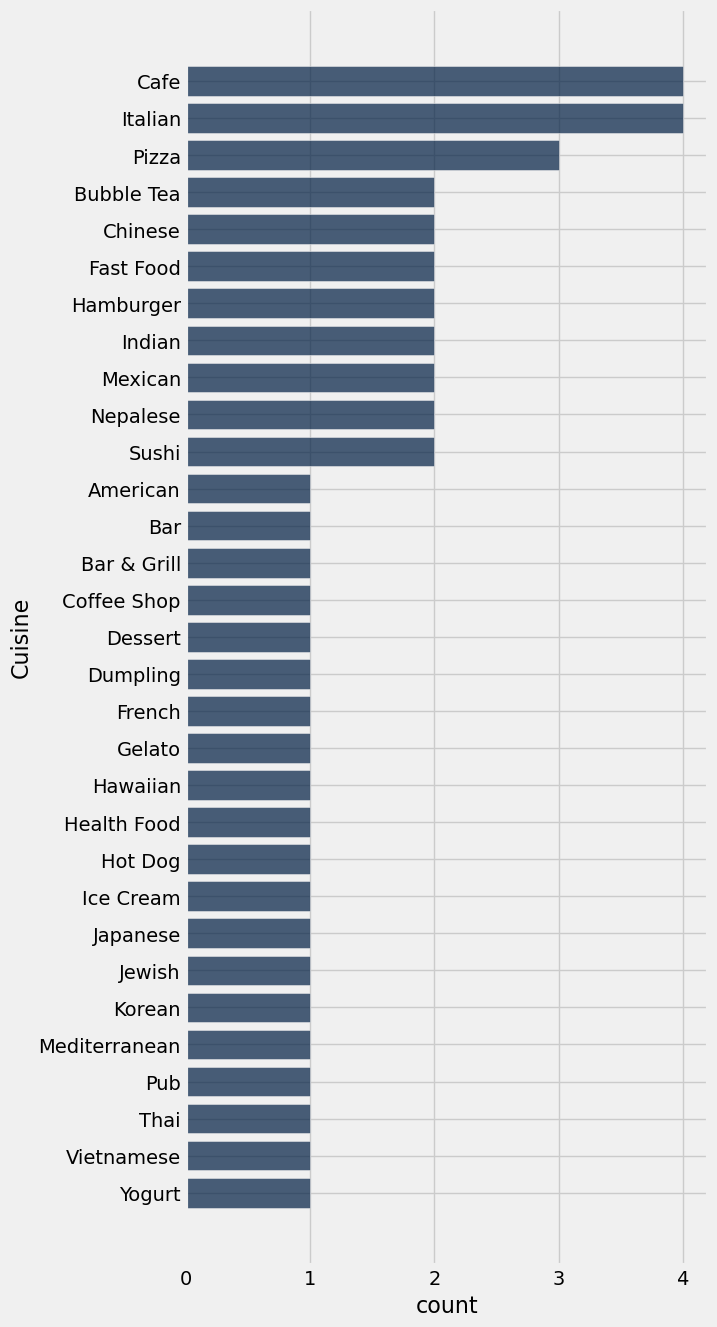

In [12]:
restaurants.group('Cuisine').sort('count',descending=True).barh('Cuisine')

### Review Question 2

In [15]:
restaurants.column('Close Time')-restaurants.column('Open Time')

array([  4.75,  16.  ,  10.  ,   4.  ,  12.  ,  16.  ,   9.  ,   8.  ,
        13.5 ,  10.  ,  12.  ,  13.  ,  11.  ,   5.  ,   7.  ,  10.  ,
         7.5 ,  14.  ,   6.  ,  15.  ,   3.5 ,  10.5 ,  11.  ,  15.  ,
         9.  ,   5.  ,  12.  ,  10.5 ,   4.5 ,  10.  ,   8.5 ,  13.  ,
         7.  ,  13.  ,  10.  ,   9.5 ,   9.5 ,  15.  ,  10.  ,   5.  ,
         5.5 ,  16.  ,   9.5 ,   5.  ,  13.  ,   9.  ,  11.5 ])

In [ ]:
restaurants.with_columns('Time Open', 
                         restaurants.column('Close Time')-restaurants.column('Open Time'))

### Review Question 3

In [16]:
def simulated_difference(table, group_label, variable_label, function):
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       - statistic to be calculated (as a function)
       
    Returns: Difference in statistics of the two groups
    """
    shuffled_group = table.select(group_label).sample(with_replacement=False)
    simulated_table = Table().with_columns(group_label, shuffled_group.column(0),
                                        variable_label, table.column(variable_label))
    
    stats_array = simulated_table.group(group_label, function).column(1)
    
    
    return stats_array.item(0)-stats_array.item(1)

In [19]:
restaurants.group('Neighborhood', np.average).select('Neighborhood','Price average')

Neighborhood,Price average
North Berkeley,1.89474
Southside,1.17857


In [20]:
group_array = restaurants.group('Neighborhood', np.average).column('Price average')

In [43]:
observed_difference = group_array.item(0)-group_array.item(1)
observed_difference

0.7161654135338344

In [22]:
restaurants.group('Neighborhood')

Neighborhood,count
North Berkeley,19
Southside,28


### Review Question 4

### Review Question 5

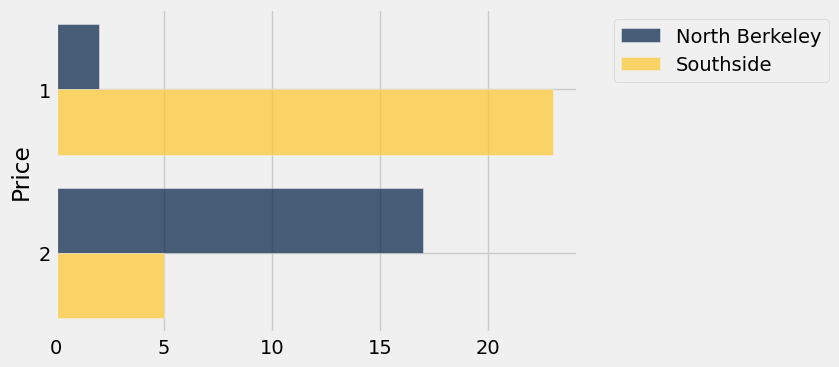

In [28]:
restaurants.pivot('Neighborhood','Price').barh('Price')

In [35]:
simulated_difference(restaurants,'Neighborhood','Price',np.average)

0.45112781954887216

In [36]:
simulated_differences = make_array()

for i in np.arange(1000):
    one_difference = simulated_difference(restaurants,'Neighborhood','Price',np.average)
    simulated_differences = np.append(simulated_differences, one_difference)

In [37]:
simulated_differences

array([ 0.09774436,  0.18609023,  0.09774436, -0.07894737,  0.0093985 ,
       -0.07894737, -0.07894737, -0.07894737, -0.16729323, -0.07894737,
        0.0093985 , -0.07894737,  0.27443609,  0.0093985 ,  0.18609023,
       -0.07894737, -0.07894737,  0.0093985 , -0.07894737,  0.0093985 ,
       -0.07894737, -0.43233083, -0.2556391 ,  0.0093985 , -0.07894737,
       -0.07894737, -0.07894737,  0.0093985 ,  0.18609023, -0.07894737,
        0.0093985 , -0.16729323, -0.16729323, -0.07894737,  0.09774436,
        0.09774436,  0.18609023,  0.0093985 ,  0.09774436, -0.07894737,
       -0.07894737,  0.0093985 ,  0.09774436, -0.16729323,  0.0093985 ,
        0.09774436,  0.09774436,  0.0093985 ,  0.0093985 ,  0.0093985 ,
       -0.16729323,  0.27443609,  0.18609023, -0.07894737,  0.0093985 ,
       -0.2556391 , -0.16729323, -0.16729323, -0.07894737,  0.0093985 ,
       -0.16729323,  0.0093985 , -0.16729323,  0.09774436,  0.0093985 ,
       -0.07894737,  0.18609023,  0.18609023,  0.0093985 ,  0.09

In [39]:
observed_difference

0.7161654135338344

### Review Question 6

In [50]:
np.count_nonzero(simulated_differences >= observed_difference)/1000

1

### Review Question 7